Name : Amit Ghogre   Student id: 8833038   Section: 1

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

Detect and handle outliers for the “median_house_value” field using:
a. Apply the whiskers approach to identify outlier rows.

In [3]:
df = pd.read_csv('housing_dataset.csv') 

Q1 = df['median_house_value'].quantile(0.25)
Q3 = df['median_house_value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Left whisker: ",lower_bound)
print("Right Whisker: ",upper_bound)

outliers = df[(df['median_house_value'] < lower_bound) | (df['median_house_value'] > upper_bound)]
print("Outlier rows are following: ",outliers,sep="\n")




Left whisker:  -96337.5
Right Whisker:  482162.5
Outlier rows are following: 
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
19568    -118.37     33.81                33.0       5057.0           790.0   
19569    -117.19     32.69                35.0       2921.0           438.0   
19570    -117.87     33.60                34.0       3415.0           779.0   
19571    -118.59     34.14                19.0       1303.0           155.0   
19572    -122.18     37.81                30.0        292.0            38.0   
...          ...       ...                 ...          ...             ...   
20635    -118.90     34.14                35.0       1503.0           263.0   
20636    -118.69     34.18                11.0       1177.0           138.0   
20637    -118.80     34.19                 4.0      15572.0          2222.0   
20638    -118.69     34.21                10.0       3663.0           409.0   
20639    -118.85     34.27                50.0       

Apply Z-score normalization and choose appropriate threshold to match the
outliers from the whiskers approach 

In [4]:

# Z-score
mean = df['median_house_value'].mean()
std = df['median_house_value'].std()
df['z_score'] = (df['median_house_value'] - mean) / std

threshold = 2.5

# Outlier rows
outliers = df[df['z_score'] > threshold]
print("no. of outliers: ",len(outliers))
print(outliers)


no. of outliers:  1005
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
19635    -122.71     37.88                21.0       2845.0           552.0   
19636    -122.27     37.47                44.0       3022.0           473.0   
19637    -122.26     37.45                17.0       2742.0           441.0   
19638    -117.25     32.72                33.0       1677.0           228.0   
19639    -121.97     37.25                21.0       2775.0           389.0   
...          ...       ...                 ...          ...             ...   
20635    -118.90     34.14                35.0       1503.0           263.0   
20636    -118.69     34.18                11.0       1177.0           138.0   
20637    -118.80     34.19                 4.0      15572.0          2222.0   
20638    -118.69     34.21                10.0       3663.0           409.0   
20639    -118.85     34.27                50.0        187.0            33.0   

       population  household

#2.a <br>
Since the data is skewed, it is better to use the median to impute missing values. This is because the median is less sensitive to outliers than the mean, and therefore, is a more robust measure of central tendency for skewed data.


In [5]:

#Checking missing values
print(df.isnull().sum())


for col in df.columns:
    if df[col].dtype != 'object':
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].mean(), inplace=True)

# Verifying
print(df.isnull().sum())

longitude               0
latitude                0
housing_median_age     11
total_rooms            15
total_bedrooms        207
population             19
households             14
median_income           8
median_house_value     80
ocean_proximity       154
z_score                80
dtype: int64
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms          0
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity       154
z_score                 0
dtype: int64


2.b <br>
Working on categorical feature: ocean_proximity

In [6]:
# Check for missing values
print("missing values of ocean_proximity: ",df['ocean_proximity'].isnull().sum())

# Impute missing values with the mode
df['ocean_proximity'].fillna(df['ocean_proximity'].mode()[0], inplace=True)

# Verify that there are no missing values
print("Verifying no missing values of ocean_proximity: ",df['ocean_proximity'].isnull().sum())

missing values of ocean_proximity:  154
Verifying no missing values of ocean_proximity:  0


3. Investigate the existence of errors/inconsistencies in the fields and solve them <br>

In [7]:

print(df.describe())

# Checking for inconsistent or incorrect values in categorical features
print(df['ocean_proximity'].unique())

# Checking for inconsistent or incorrect values in numerical features
print(df[df['total_rooms'] == 0])

# any errors or inconsistencies
df = df[df['total_rooms'] > 0]

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.633380   2636.314812   
std        2.003532      2.135952           12.580813   2181.391445   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1448.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3146.250000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.785510    499.675555       3.871003   
std        419.266592   1132.277835    382.275441       1.899601   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.00000

#4 Normalize numerical features using appropriate method based on feature
characteristics.

In [8]:

# Identify the numerical features that need to be normalized
num_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

# Check the distribution of each numerical feature
print(df[num_features].describe())

# Normalize the numerical features using the appropriate method
scaler = StandardScaler() # or MinMaxScaler()
df[num_features] = scaler.fit_transform(df[num_features])

# Verify that the numerical features are normalized
print(df[num_features].describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.633380   2636.314812   
std        2.003532      2.135952           12.580813   2181.391445   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1448.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3146.250000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.785510    499.675555       3.871003   
std        419.266592   1132.277835    382.275441       1.899601   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.00000

NameError: name 'StandardScaler' is not defined

5 Encode categorical variables using using appropriate method based on feature
characteristics.

In [ ]:

# Encoding
df = pd.get_dummies(df, columns=['ocean_proximity'])

# Verifying
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.582392  1.909330           -1.003935    -1.091279       -1.103224   
1   1.272636  0.359632           -0.765534    -0.924470       -0.709275   
2   0.853366 -0.651651            1.856872    -0.840149       -0.642826   
3  -1.797018  2.190242            0.585402    -1.163227       -1.210017   
4   0.618775 -0.693788            0.823803    -0.982211       -0.877771   

   population  households  median_income  median_house_value  \
0   -1.183632   -1.207324      -1.163364           -1.667415   
1   -0.826102   -0.877822      -0.932145           -1.667415   
2   -0.704277   -0.718302       0.169584           -1.667415   
3   -1.242779   -1.285776      -1.755336           -1.667415   
4   -1.030027   -0.945814      -0.791770           -1.645733   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                      False                    True                   False   
1   

6. Engineer one new feature based on existing features

In [ ]:
# Engineer a new feature for bedroom to room ratio
df['bedroom_to_room_ratio'] = df['total_bedrooms'] / df['total_rooms']
# Engineer a new feature for age of the property
df['property_age'] = 2023 - df['housing_median_age']
# Verifying that the new features are added to the datas
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.582392  1.909330           -1.003935    -1.091279       -1.103224   
1   1.272636  0.359632           -0.765534    -0.924470       -0.709275   
2   0.853366 -0.651651            1.856872    -0.840149       -0.642826   
3  -1.797018  2.190242            0.585402    -1.163227       -1.210017   
4   0.618775 -0.693788            0.823803    -0.982211       -0.877771   

   population  households  median_income  median_house_value  \
0   -1.183632   -1.207324      -1.163364           -1.667415   
1   -0.826102   -0.877822      -0.932145           -1.667415   
2   -0.704277   -0.718302       0.169584           -1.667415   
3   -1.242779   -1.285776      -1.755336           -1.667415   
4   -1.030027   -0.945814      -0.791770           -1.645733   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                      False                    True                   False   
1   

Descriptive Analytics Tasks (6 Points): <br>
1. (3 points) Investigate the distribution of housing prices across different ocean proximities in
California

C:\Users\Amit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Amit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Amit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

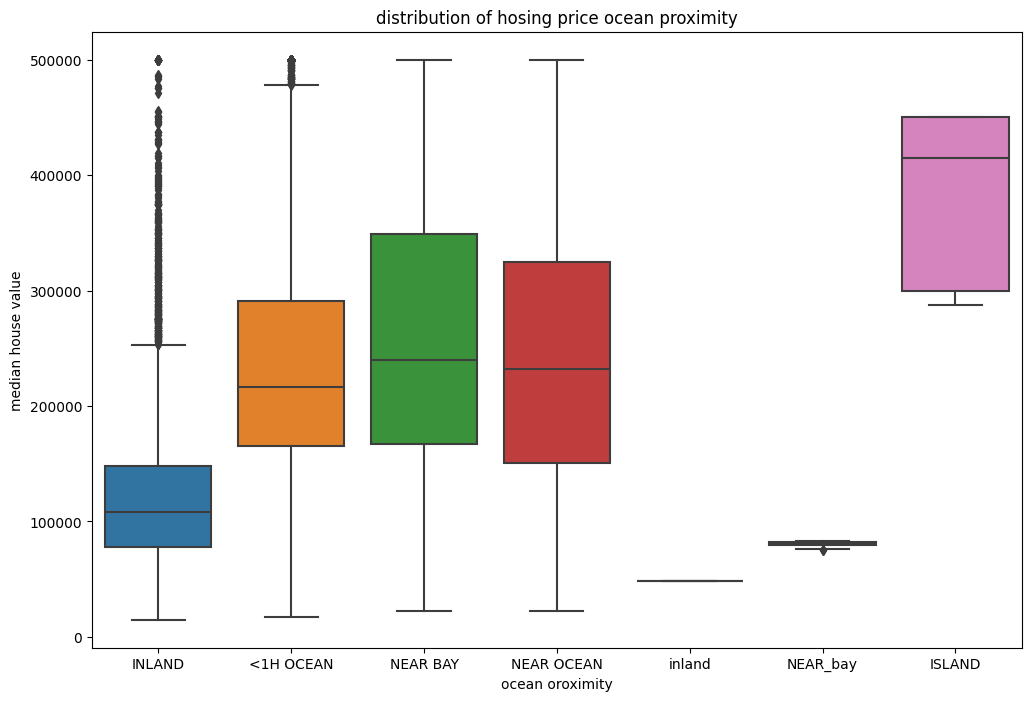

In [ ]:
df = pd.read_csv('housing_dataset.csv')
plt.figure(figsize=(12, 8))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df)
plt.title('distribution of hosing price ocean proximity')
plt.ylabel('median house value')
plt.xlabel('ocean oroximity')
plt.show()

 Analyze the relationship between median income and housing prices

C:\Users\Amit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Amit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Amit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

C:\Users\Amit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Amit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


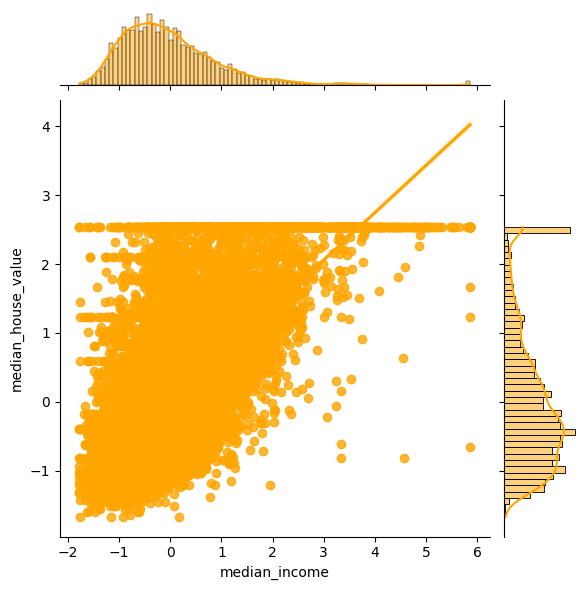

In [ ]:
# Visualize the relationship between median income and housing prices using a scatter plot with a regression line
sns.jointplot(x='median_income', y='median_house_value', data=df, kind='reg',color='orange')

ML Model Training and Testing Tasks (14 Points):
1. (1 point) Split the cleaned data into training and testing sets (e.g., 80% training, 20% testing)

In [9]:
dfnew = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

# Fill NaN values for numeric columns with their median
for column in dfnew.select_dtypes(include=['float64', 'int64']).columns:
    dfnew[column].fillna(dfnew[column].median(), inplace=True)

# Assuming there are other categorical columns after encoding 
for column in dfnew.select_dtypes(exclude=['float64', 'int64']).columns:
    mode_val = dfnew[column].mode()[0]
    dfnew[column].fillna(mode_val, inplace=True)

In [10]:

#separating features
X = dfnew.drop('median_house_value', axis=1)
y = dfnew['median_house_value']

# Spliting dats
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2. Train a linear regression model as a baseline model.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 4888061805.542042


3) Print the learned coefficients (weights) of the model.

In [ ]:
print('Learned coefficients:')
for feature, coef in zip(X_train.columns, model.coef_):
    print(feature, ':', coef)

Learned coefficients:
longitude : -27160.881626728373
latitude : -25810.09064411229
housing_median_age : 1044.367933596722
total_rooms : -3.9732266870087187
total_bedrooms : 76.56375690333789
population : -44.310950408191275
households : 78.94385083380848
median_income : 38537.98168062622
ocean_proximity_INLAND : -40083.01802575634
ocean_proximity_ISLAND : 152825.16713826556
ocean_proximity_NEAR BAY : -4122.8048850506075
ocean_proximity_NEAR OCEAN : 4206.7433656409
ocean_proximity_NEAR_bay : -89679.24924479544
ocean_proximity_inland : -48703.69793202106


4) Evaluate the model's performance on the test set using the following metrics:
a. Mean Absolute Error (MAE)
b. Mean Squared Error (MSE)

In [ ]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
# Print the evaluation metrics
print('Evaluation metrics:')
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)

Evaluation metrics:
Mean Absolute Error: 49972.221152144215
Mean Squared Error: 4888061805.542042


5) Try 2 other regression algorithms and compare their performance to the linear
regression baseline

In [ ]:

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)

dt_mae = mean_absolute_error(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)

print('Decision Tree Regression - Mean Absolute Error:', dt_mae)
print('Decision Tree Regression - Mean Squared Error:', dt_mse)




Decision Tree Regression - Mean Absolute Error: 44215.56976744186
Decision Tree Regression - Mean Squared Error: 4830618809.295543


In [ ]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

print('Random Forest Regression - Mean Absolute Error:', rf_mae)
print('Random Forest Regression - Mean Squared Error:', rf_mse)



Random Forest Regression - Mean Absolute Error: 32119.64178052326
Random Forest Regression - Mean Squared Error: 2431528542.9064927
